In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [24]:
def ES(iterations, ppl_size, number_of_offspring, chromosome_length, eval_function,
        tau, tau0, lambda_mi=False, min_value=0.0, max_value=1.0, variance=5*1e-2):
    
    costs = np.zeros((iterations, ppl_size))
    sigmas = np.zeros((iterations))
        
    #initial population
    current_population = np.random.uniform(min_value, max_value, size=(ppl_size, 2, chromosome_length))
    current_population[:,1,:] = variance * np.ones((ppl_size, chromosome_length))
    
    #score for initial population
    objective_values = eval_function(current_population[:,0,:])

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    
    for iter_num in range(iterations):
        #roulette
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() != 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(ppl_size) / ppl_size 
        
        #selection
        parent_indices = np.random.choice(ppl_size, number_of_offspring, True, fitness_values).astype(np.int64)
        
        children_population = np.empty((number_of_offspring, 2, chromosome_length))
        #mutation
        children_population[:, 1, :] = current_population[parent_indices, 1, :] * \
            np.exp(np.random.normal(0, tau, (number_of_offspring, chromosome_length)) + np.random.normal(0, tau0, size=(number_of_offspring,1)))
        children_population[:, 0, :] = current_population[parent_indices, 0, :] + np.random.normal(0, children_population[:, 1, :])
     
        children_population[:, 0, :][children_population[:, 0, :] < min_value] = min_value
        children_population[:, 0, :][children_population[:, 0, :] > max_value] = max_value
        
        #children score
        children_objective_values = eval_function(children_population[:, 0, :])
        if lambda_mi:
            current_population = np.vstack([children_population, current_population])
            objective_values = np.hstack([children_objective_values, objective_values])
        else:
            current_population = children_population
            objective_values = children_objective_values
        
        #sort
        I = np.argsort(objective_values)
        current_population = current_population[I[:ppl_size], :, :]
        objective_values = objective_values[I[:ppl_size]]
        
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        
        costs[iter_num,:] = objective_values
        sigmas[iter_num] = current_population[:, 1, :].mean()
    
    plt.figure(figsize=(12,4))
    plt.plot(sigmas, label='Standard deviation')
    plt.legend()
    plt.xlabel("iterations")
    plt.ylabel("sigma")
    plt.show()
    
    return costs

schwefel, optim value = 0


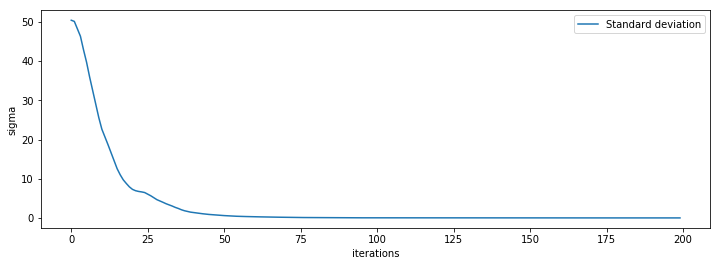

time = 1.481082 sec.
minimums: [746.4381220408668]
total min = 746.438122041


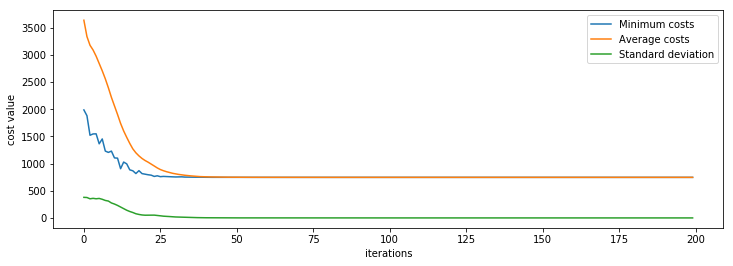

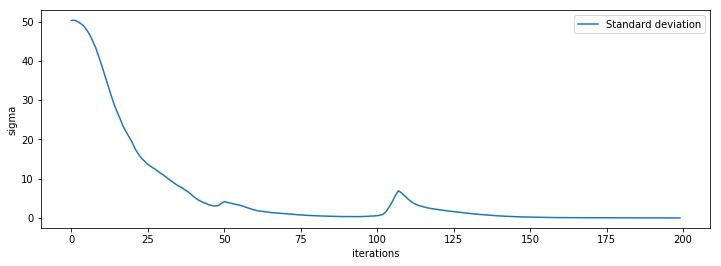

time = 0.841057 sec.
minimums: [690.89301821203981]
total min = 690.893018212


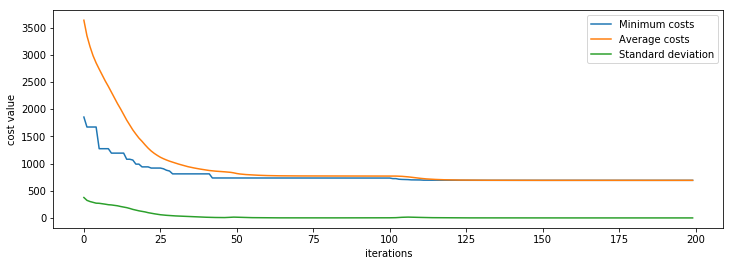

In [27]:
print("schwefel, optim value = 0")
for l_m, v, offspring in zip([False, True], [10.0, 10.0], [4000, 2000]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 10
    for _ in range(1):
        cost_list.append(
            ES( iterations=200,
               ppl_size=2000,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=schwefel, 
               tau=0.3/(math.sqrt(2*chromosome_len)),
               tau0=0.3/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-512, 
               max_value=512,
               variance=50.0))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

In [3]:
# -600 < x < 600
# f(0) = 0
def griewank(X):
    return 1 + (X**2).sum(axis=1)/4000.0 - np.cos(X/np.sqrt(np.arange(X.shape[1])+1)).prod(axis=1)


# -5.12 < x < 5.12
#f(0) = 0
def rastrigin(X):
    return 10*X.shape[1] + ((X**2) - 10*np.cos(2*math.pi*X)).sum(axis=1)

# -512 < x < 512
# f(420.968746) = 0
def schwefel(X):
    return ( -X*np.sin(np.sqrt(np.abs(X))) ).sum(axis=1) + 418.982887* X.shape[1]

# -10 < x < 10
# f(x_i = 2^(-(2^i -2) / 2^i)) = 0
def dixon(X): 
    return ((X[:,0] - 1) ** 2) + (np.arange(2,X.shape[1]+1)*( ( (2*(X[:,1:] ** 2)) - X[:,:-1] )**2 )).sum(axis=1)

# -5 < X < 10
def rosenbrock(X):
    return (100 * ( (X[:,1:]-(X[:,:-1]**2))  **2) + (1 - X[:,:-1])**2 ).sum(axis=1)


import math
import multiprocessing as mp

In [4]:
def min_avg_costs(cost_list):
    costs = np.array(cost_list).mean(axis=0)
    min_costs = costs.min(axis=1)
    avg_costs = costs.mean(axis=1)
    std = costs.std(axis=1)
    
    return min_costs, avg_costs, std

def show_results(cost_list):
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    min_costs, avg_costs, std = min_avg_costs(cost_list)
    
    plt.figure(figsize=(12,4))
    plt.plot(min_costs, label='Minimum costs')
    plt.plot(avg_costs, label='Average costs')
    plt.plot(std, label='Standard deviation')
    plt.legend()
    plt.xlabel("iterations")
    plt.ylabel("cost value")
    plt.show()
    
def show_results_constrained(cost_list):
    minimums = [cost.min() for cost in cost_list]
    print("minimums: " + str(minimums) )
    print("total min = " + str(min(minimums)))
    
    costs = np.array(cost_list).mean(axis=0)
    
    plt.figure(figsize=(12,4))
    plt.plot(costs, label='Average costs')
    plt.legend()
    plt.xlabel("iterations")
    plt.ylabel("cost value")
    plt.show()

Griewank, optim value = 0, lambda+mi


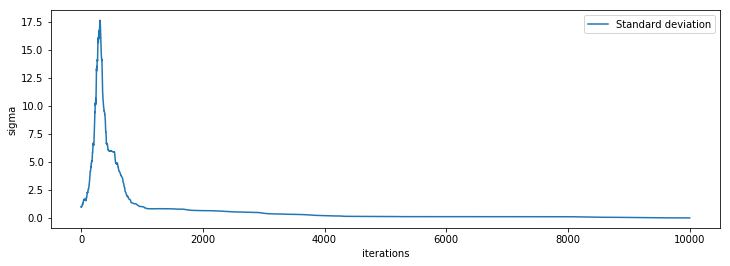

time = 69.242572 sec.
minimums: [6.671421482817852e-05]
total min = 6.67142148282e-05


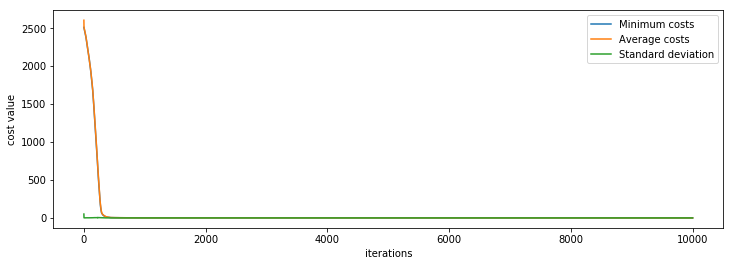

In [290]:
print("Griewank, optim value = 0, lambda+mi")
for v,l_m in zip([ 1.0],[True]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 100
    for _ in range(1):
        cost_list.append(
            ES( iterations=10000,
               ppl_size=100,
               number_of_offspring=500,
               chromosome_length=chromosome_len,
               eval_function=griewank, 
               tau=0.1/(math.sqrt(2*chromosome_len)),
               tau0=0.1/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-600.0, 
               max_value=600.0,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

Griewank, optim value = 0, lambda+mi


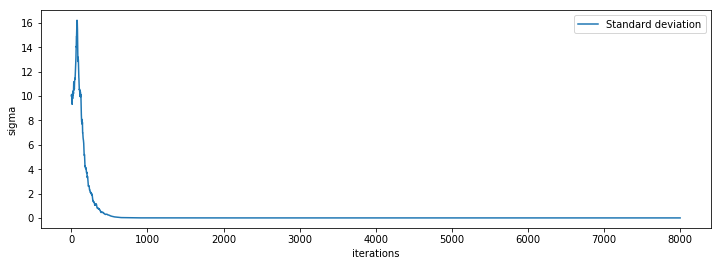

time = 6.378837 sec.
minimums: [1.1102230246251565e-16]
total min = 1.11022302463e-16


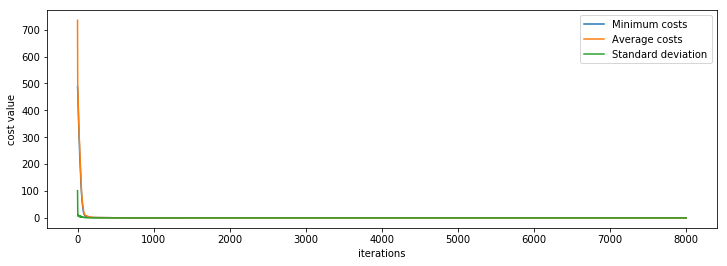

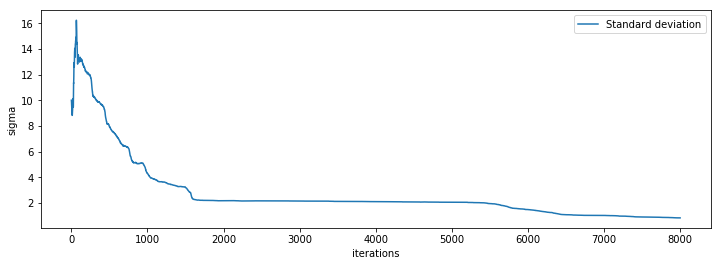

time = 7.052392 sec.
minimums: [0.41118020304035163]
total min = 0.41118020304


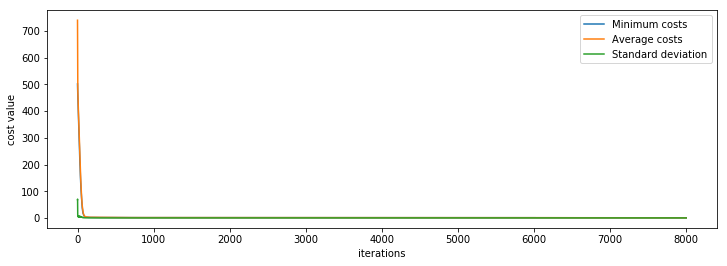

In [282]:
print("Griewank, optim value = 0, lambda+mi")
for v,l_m in zip([10.0, 10.0],[False, True]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 30
    for _ in range(1):
        cost_list.append(
            ES( iterations=8000,
               ppl_size=100,
               number_of_offspring=150,
               chromosome_length=chromosome_len,
               eval_function=griewank, 
               tau=0.4/(math.sqrt(2*chromosome_len)),
               tau0=0.1/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-600.0, 
               max_value=600.0,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

rastrigin, optim value = 0


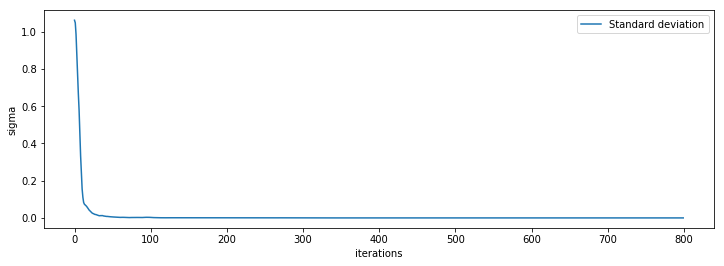

time = 14.855381 sec.
minimums: [112.42982695059447]
total min = 112.429826951


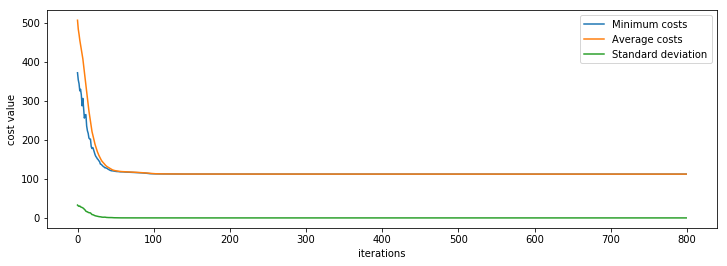

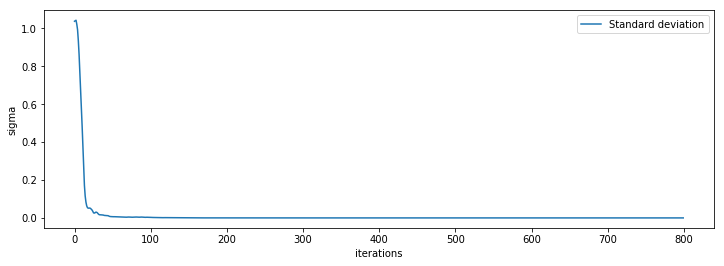

time = 14.800758 sec.
minimums: [72.631834625274507]
total min = 72.6318346253


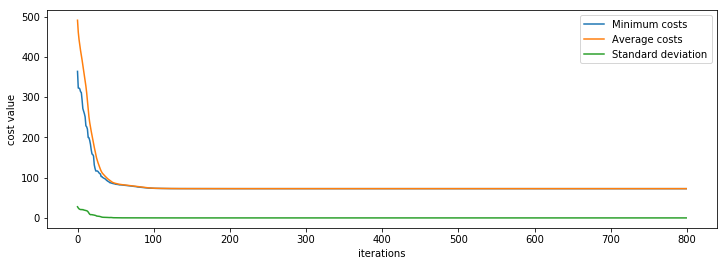

In [47]:
print("rastrigin, optim value = 0")
for l_m, offspring in zip([False, True],[4000, 4000]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 30
    for _ in range(1):
        cost_list.append(
            ES( iterations=800,
               ppl_size=2000,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=rastrigin, 
               tau=1.0/(math.sqrt(2*chromosome_len)),
               tau0=1.0/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-5.12, 
               max_value=5.12,
               variance=1.0))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

rastrigin, optim value = 0
True 0.5 0.2


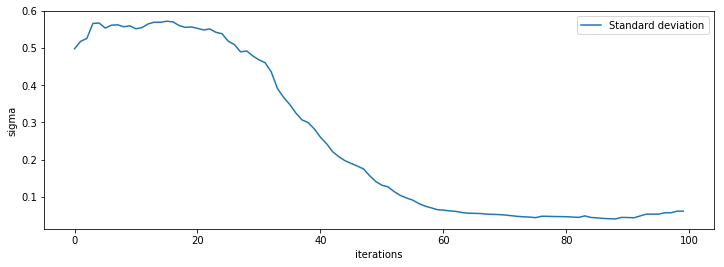

time = 0.119051 sec.
minimums: [1.011158950890632]
total min = 1.01115895089


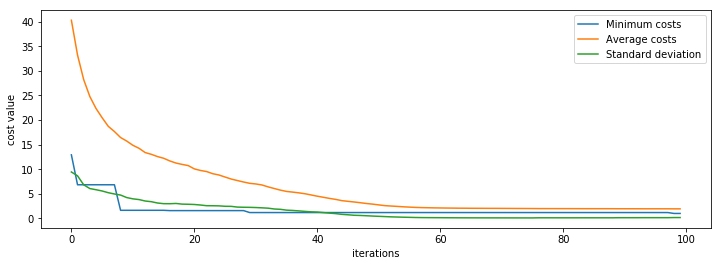

In [276]:
print("rastrigin, optim value = 0")
for l_m, offspring in zip([True],[100]):
    for v in [0.5]:
        for t in [0.2]:
            print(l_m,v,t)
            cost_list = []
            t0 = time.time()
            chromosome_len = 3
            for _ in range(1):
                cost_list.append(
                    ES( iterations=100,
                       ppl_size=100,
                       number_of_offspring=offspring,
                       chromosome_length=chromosome_len,
                       eval_function=rastrigin, 
                       tau=0.48/(math.sqrt(2*chromosome_len)),
                       tau0=0.19/(math.sqrt(2*math.sqrt(chromosome_len))),
                       lambda_mi=l_m,
                       min_value=-5.12, 
                       max_value=5.12,
                       variance=v))

            print('time = %f sec.' % (time.time() - t0))
            show_results(cost_list)

rastrigin, optim value = 0
True 0.65 0.25


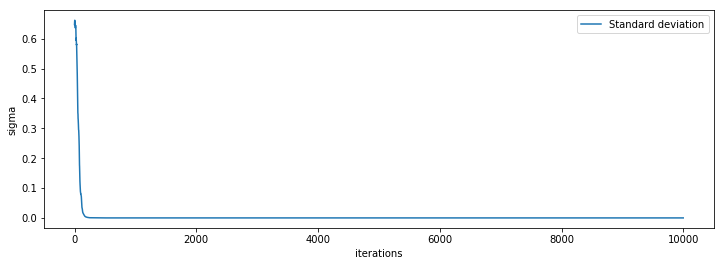

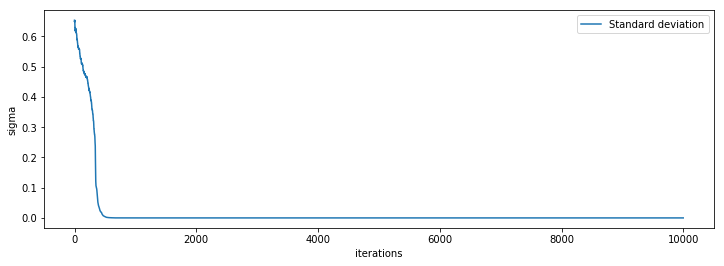

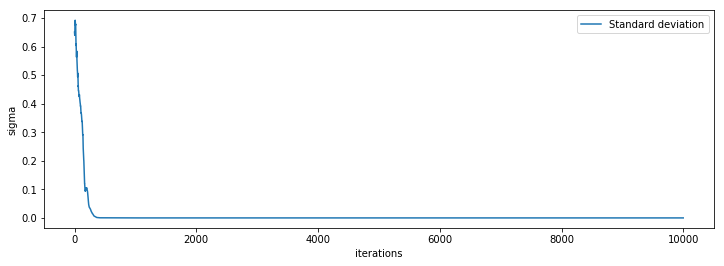

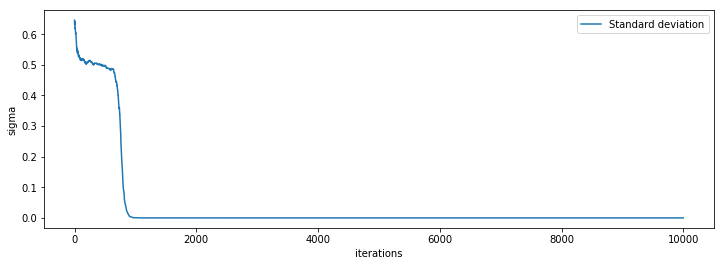

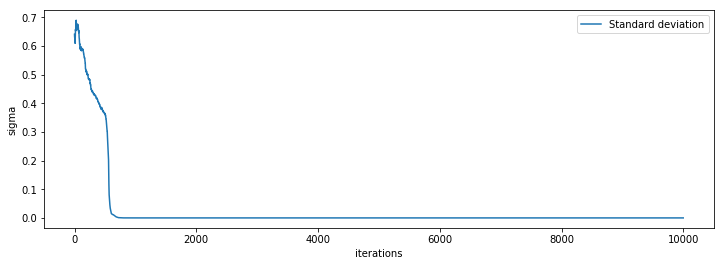

time = 17.217003 sec.
minimums: [16.914268660414251, 4.9747952854664561, 8.9546264760205361, 2.9848771712798623, 8.9546264760205361]
total min = 2.98487717128


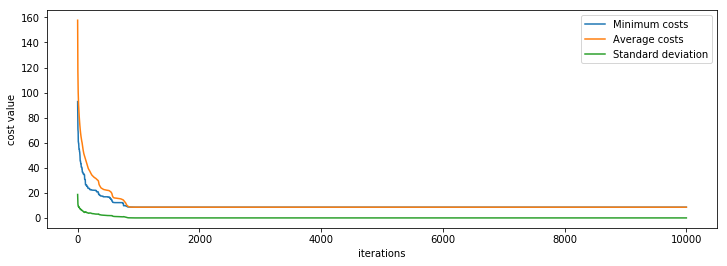

True 0.65 0.3


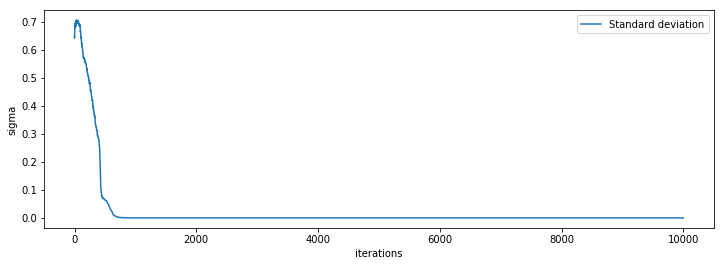

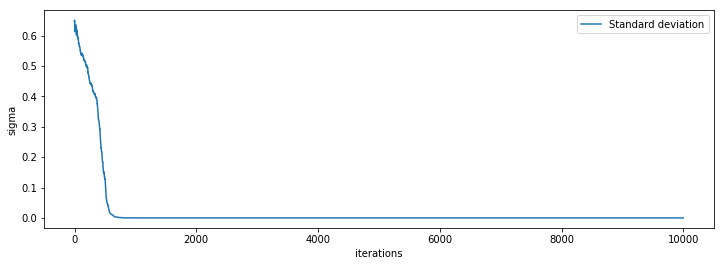

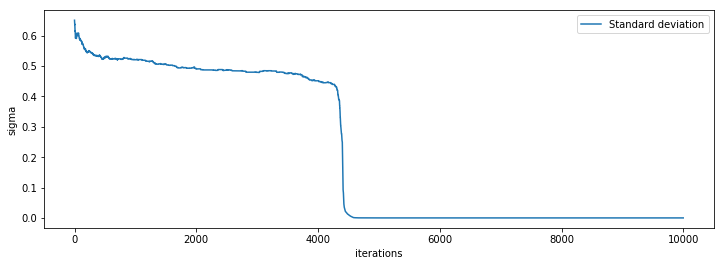

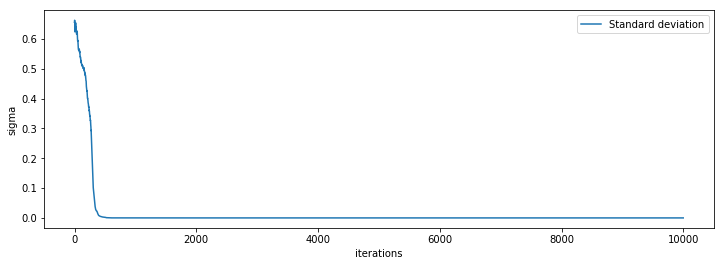

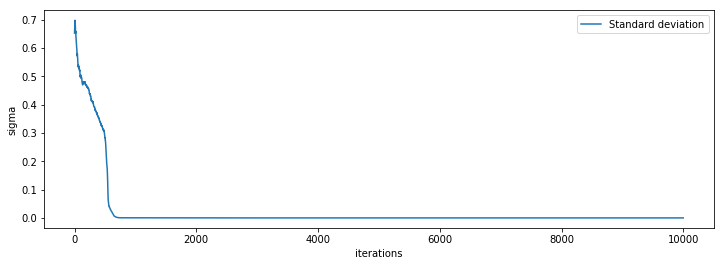

time = 17.282671 sec.
minimums: [6.9647083618339707, 11.939498609481319, 6.9647083618339565, 2.9848771712798623, 7.9596724567463184]
total min = 2.98487717128


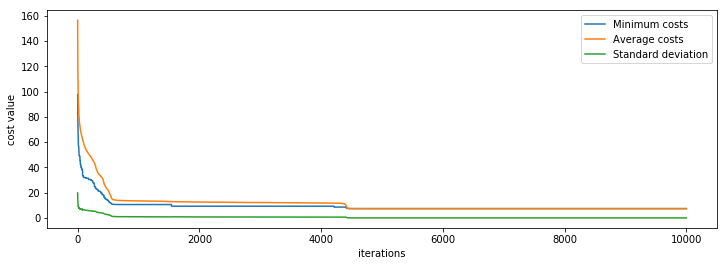

True 0.7 0.25


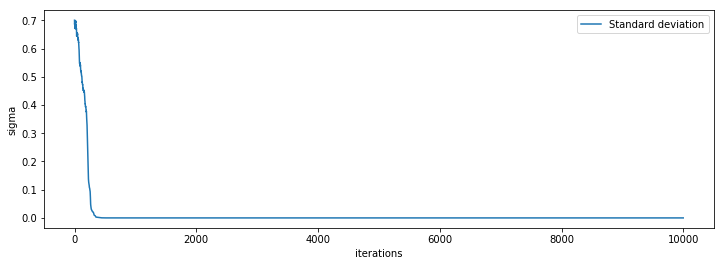

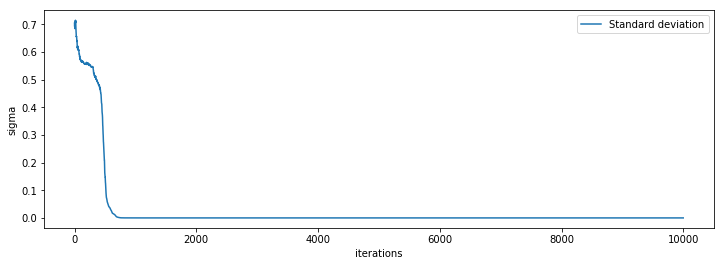

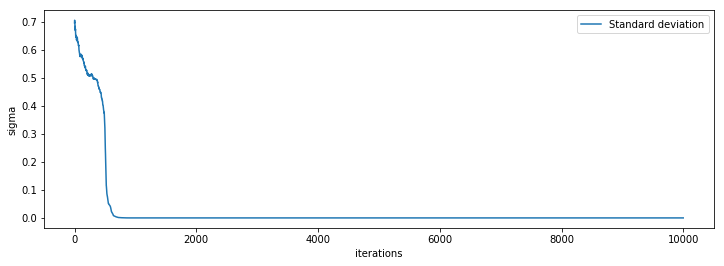

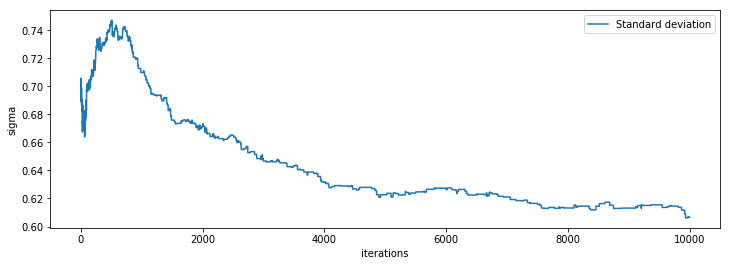

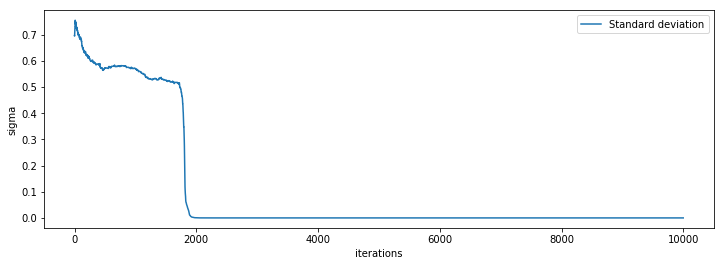

time = 17.455392 sec.
minimums: [6.9647083618339707, 8.9546264760205361, 12.934457666574644, 16.470464928624551, 7.9596674189272392]
total min = 6.96470836183


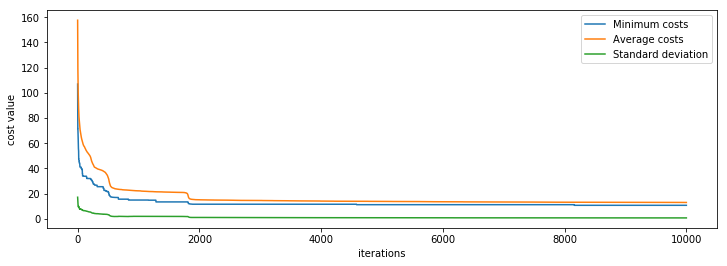

True 0.7 0.3


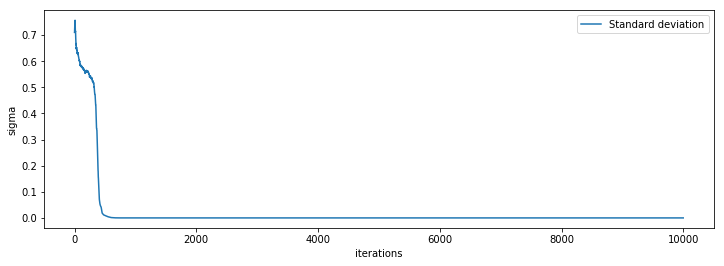

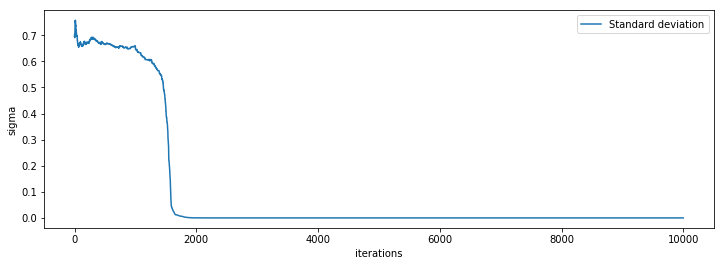

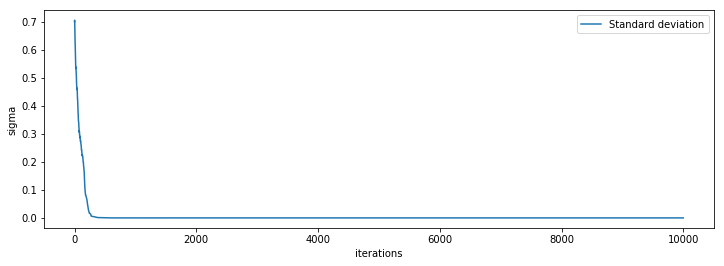

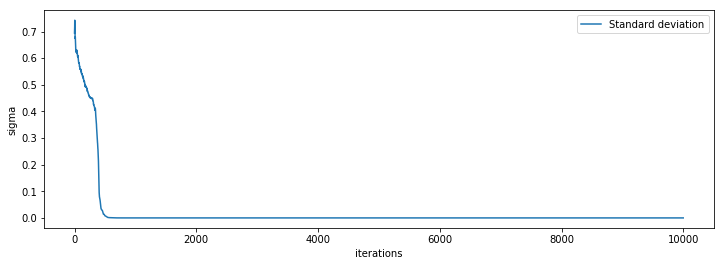

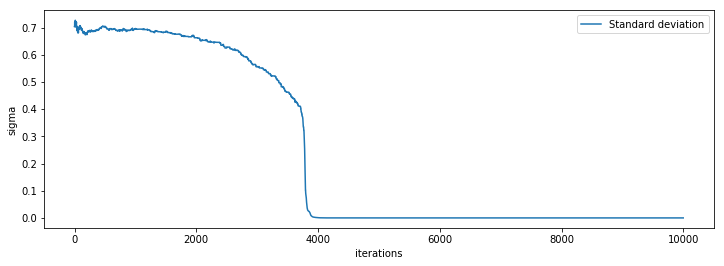

time = 17.334455 sec.
minimums: [12.934457666574616, 3.9798362283731592, 8.9546214382014568, 7.9596724567463184, 7.9596674189272392]
total min = 3.97983622837


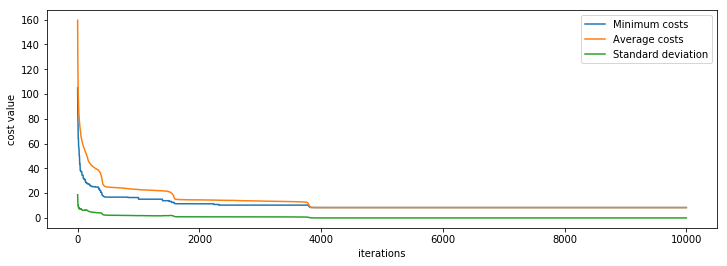

True 0.8 0.25


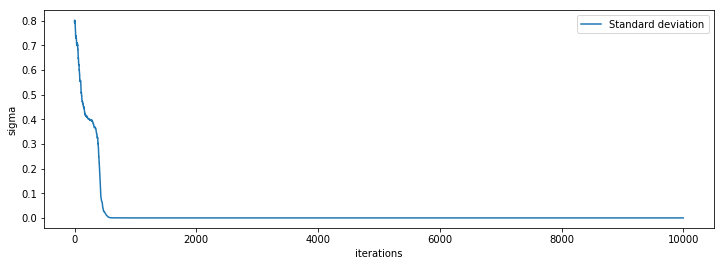

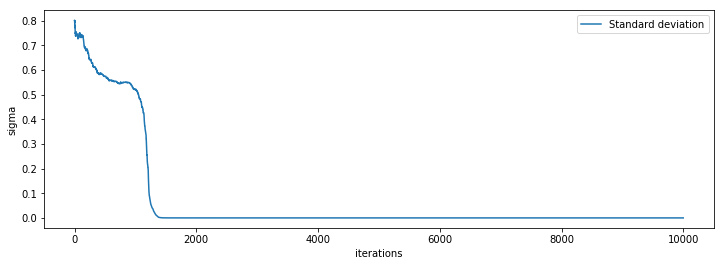

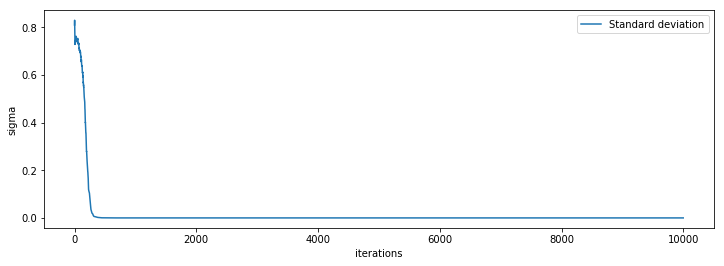

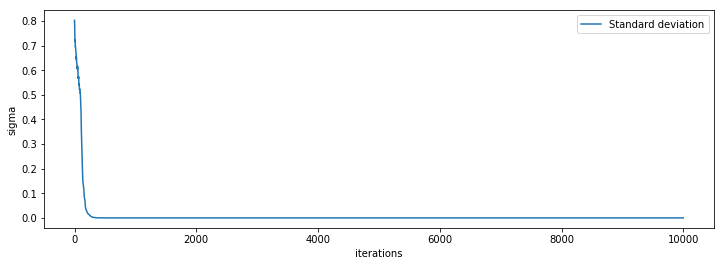

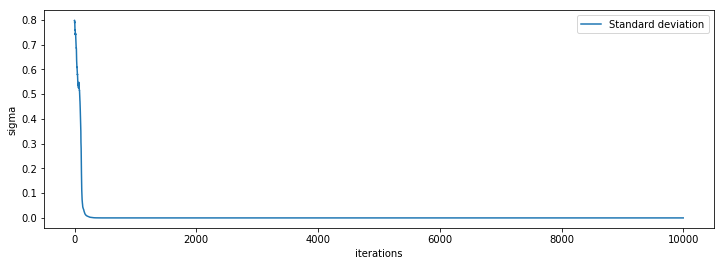

time = 17.189882 sec.
minimums: [8.9546214382014568, 5.9697493047406738, 7.9596674189272392, 6.9647133996530215, 9.949585533113833]
total min = 5.96974930474


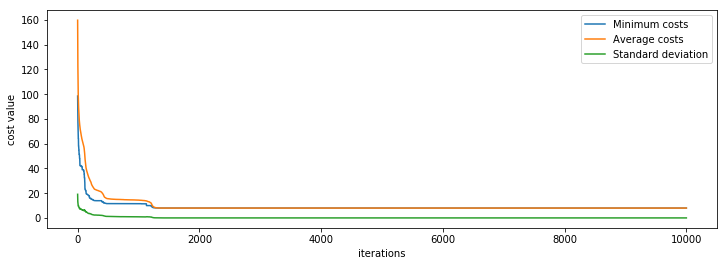

True 0.8 0.3


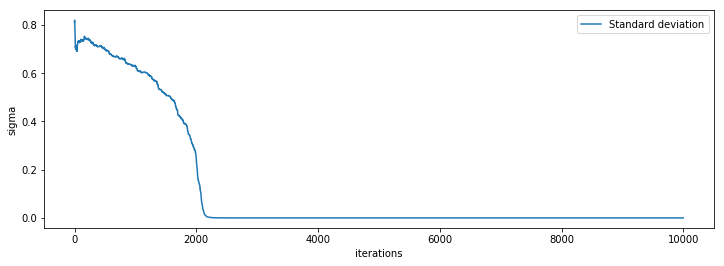

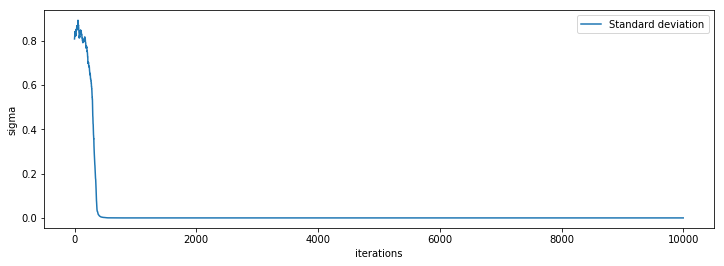

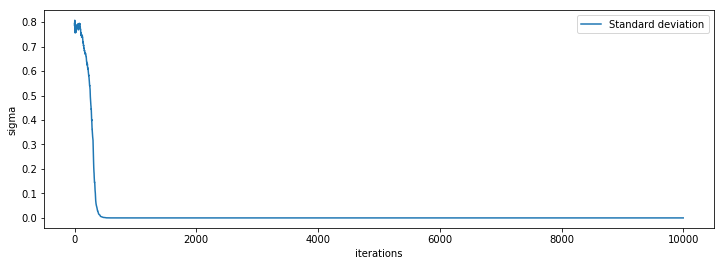

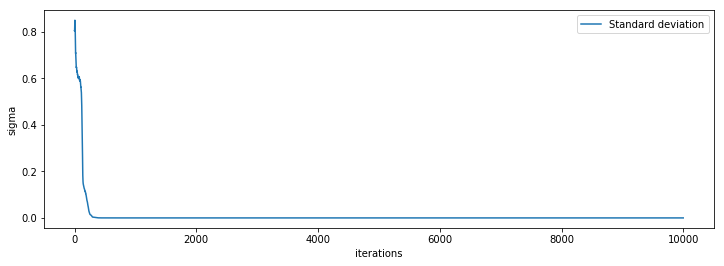

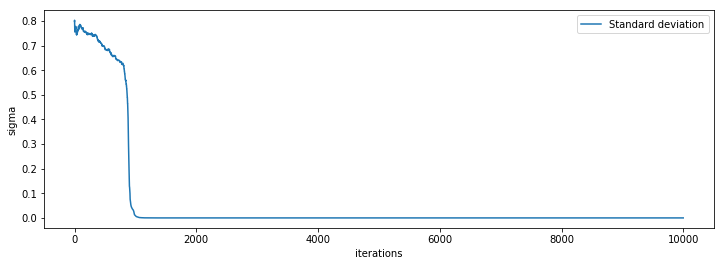

time = 17.238108 sec.
minimums: [3.9798362283731592, 15.919329800035428, 8.9546264760205361, 6.9647083618339565, 10.944539552388051]
total min = 3.97983622837


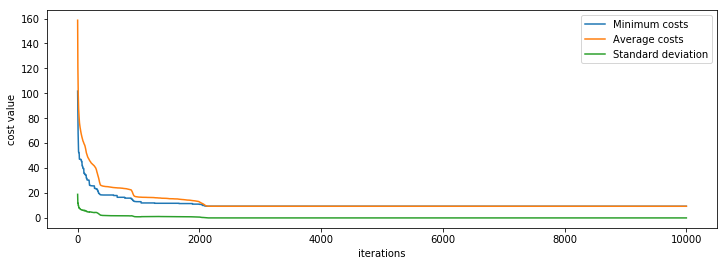

In [196]:
print("rastrigin, optim value = 0")
for l_m, offspring in zip([True],[100]):
    for v in [0.65, 0.7, 0.8]:
        for t in [0.25, 0.3]:
            print(l_m,v,t)
            cost_list = []
            t0 = time.time()
            chromosome_len = 10
            for _ in range(5):
                cost_list.append(
                    ES( iterations=10000,
                       ppl_size=100,
                       number_of_offspring=offspring,
                       chromosome_length=chromosome_len,
                       eval_function=rastrigin, 
                       tau=t/(math.sqrt(2*chromosome_len)),
                       tau0=0.2/(math.sqrt(2*math.sqrt(chromosome_len))),
                       lambda_mi=l_m,
                       min_value=-5.12, 
                       max_value=5.12,
                       variance=v))

            print('time = %f sec.' % (time.time() - t0))
            show_results(cost_list)

Minimum = 1021.608370


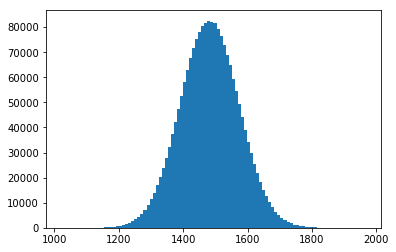

In [56]:
ppl_size = 2000000
chromosome_length = 80
random_population = np.random.uniform(-5.12, 5.12, size=(ppl_size, chromosome_length))

objective_values = rastrigin(random_population)
    
print("Minimum = %f" % objective_values.min())
plt.hist(objective_values, bins=100)
plt.show()

schwefel, optim value = 0


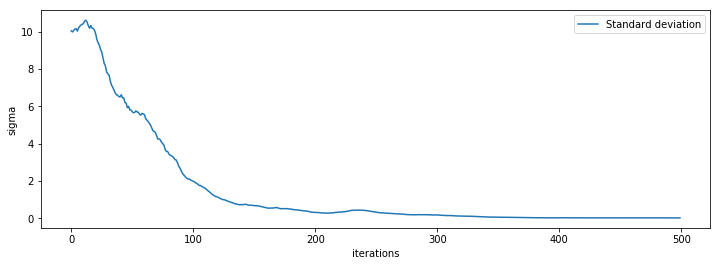

time = 1.122455 sec.
minimums: [667.64790645656285]
total min = 667.647906457


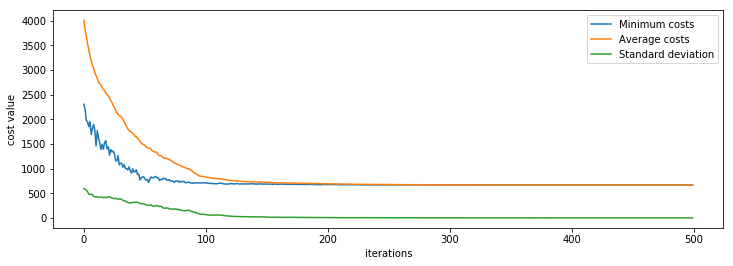

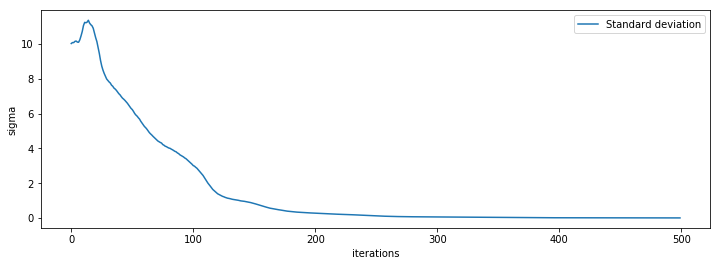

time = 0.638722 sec.
minimums: [687.20807584212889]
total min = 687.208075842


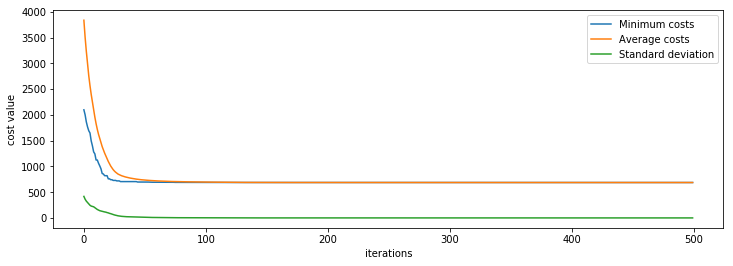

In [45]:
print("schwefel, optim value = 0")
for l_m, v, offspring in zip([False, True], [10.0, 10.0], [1000, 500]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 10
    for _ in range(1):
        cost_list.append(
            ES( iterations=500,
               ppl_size=1000,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=schwefel, 
               tau=0.3/(math.sqrt(2*chromosome_len)),
               tau0=0.2/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-512, 
               max_value=512,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

schwefel, optim value = 0
time = 344.287086 sec.
minimums: [13510.99323109023]
total min = 13510.9932311


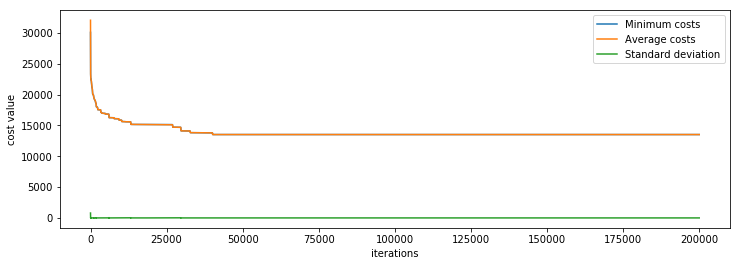

time = 194.495085 sec.
minimums: [16146.401041263693]
total min = 16146.4010413


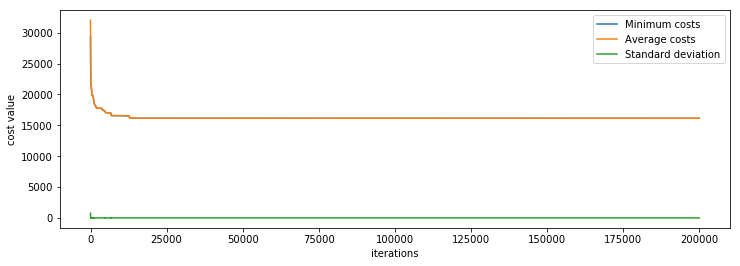

In [25]:
print("schwefel, optim value = 0")
for l_m, v, offspring in zip([False, True], [1.0, 3.5], [140, 70]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 80
    for _ in range(1):
        cost_list.append(
            ES( iterations=200000,
               ppl_size=80,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=schwefel, 
               tau=2.5/(math.sqrt(2*chromosome_len)),
               tau0=2.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-512, 
               max_value=512,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

schwefel, optim value = 0
time = 518.463037 sec.
minimums: [12357.785456730518]
total min = 12357.7854567


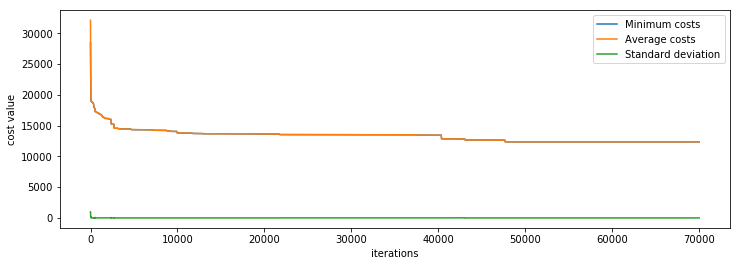

time = 365.923000 sec.
minimums: [15634.898742279598]
total min = 15634.8987423


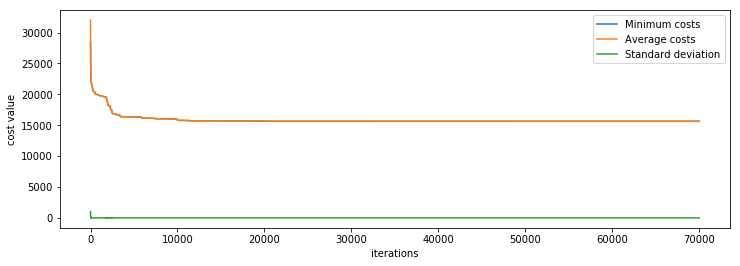

In [64]:
print("schwefel, optim value = 0")
for l_m, v, offspring in zip([False, True], [1.0, 3.5], [600, 400]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 80
    for _ in range(1):
        cost_list.append(
            ES( iterations=70000,
               ppl_size=400,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=schwefel, 
               tau=2.5/(math.sqrt(2*chromosome_len)),
               tau0=2.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-512, 
               max_value=512,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

Minimum = 25110.278596


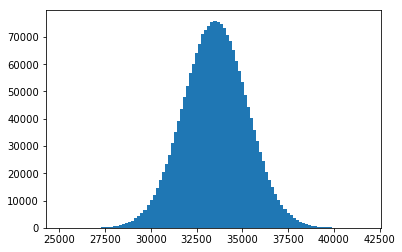

In [57]:
ppl_size = 2000000
chromosome_length = 80
random_population = np.random.uniform(-512, 512, size=(ppl_size, chromosome_length))

objective_values = schwefel(random_population)
    
print("Minimum = %f" % objective_values.min())
plt.hist(objective_values, bins=100)
plt.show()

dixon, optim value = 0
time = 735.515027 sec.
minimums: [169692.44468946208]
total min = 169692.444689


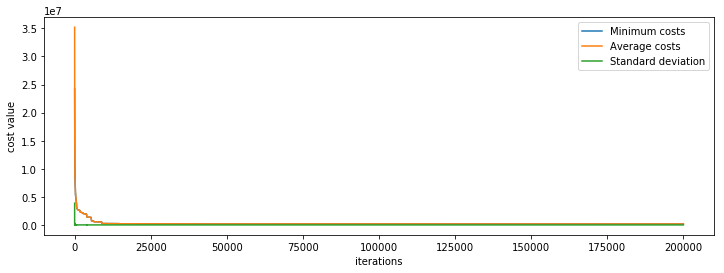

time = 515.301093 sec.
minimums: [79063.25467966513]
total min = 79063.2546797


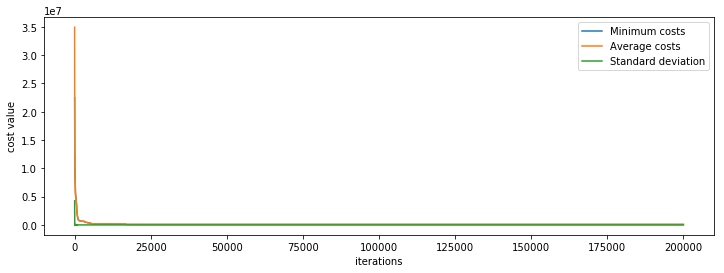

In [30]:
print("dixon, optim value = 0")
for l_m, v, offspring in zip([False, True], [0.01, 0.3], [300, 200]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 100
    for _ in range(1):
        cost_list.append(
            ES( iterations=200000,
               ppl_size=200,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=dixon, 
               tau=2.5/(math.sqrt(2*chromosome_len)),
               tau0=2.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-10, 
               max_value=10,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

dixon, optim value = 0
time = 510.675146 sec.
minimums: [101696.87078926788]
total min = 101696.870789


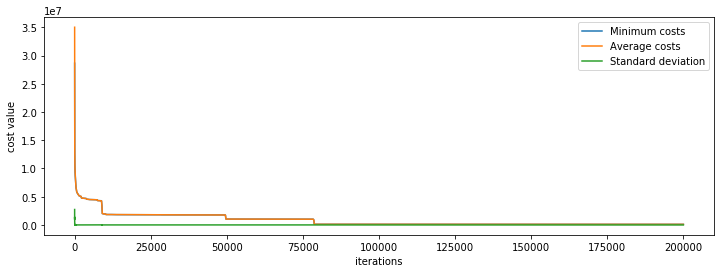

In [29]:
print("dixon, optim value = 0")
for l_m, v, offspring in zip([ True], [0.3], [200]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 100
    for _ in range(1):
        cost_list.append(
            ES( iterations=200000,
               ppl_size=120,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=dixon, 
               tau=2.5/(math.sqrt(2*chromosome_len)),
               tau0=2.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-10, 
               max_value=10,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

Minimum = 14487317.611117


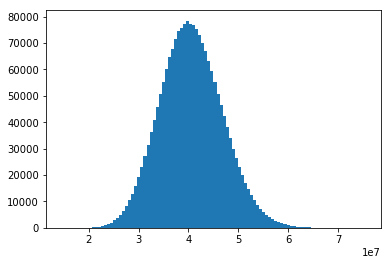

In [61]:
ppl_size = 2000000
chromosome_length = 100
random_population = np.random.uniform(-10, 10, size=(ppl_size, chromosome_length))

objective_values = dixon(random_population)
    
print("Minimum = %f" % objective_values.min())
plt.hist(objective_values, bins=100)
plt.show()

rosenbrock, optim value = 0
time = 772.320503 sec.
minimums: [32371.749767860088]
total min = 32371.7497679


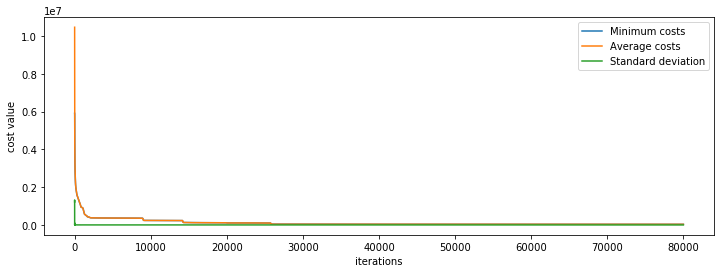

time = 406.003725 sec.
minimums: [10620.251677906503]
total min = 10620.2516779


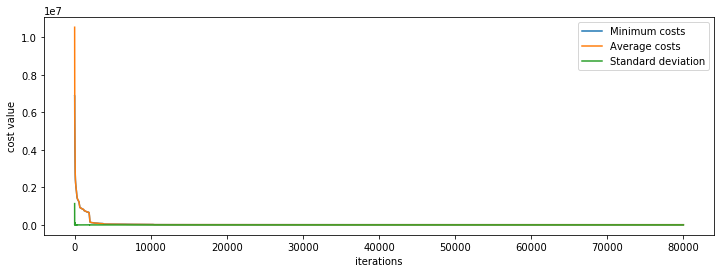

In [37]:
print("rosenbrock, optim value = 0")
for l_m, v, offspring in zip([False, True], [0.01, 0.03], [800, 400]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 100
    for _ in range(1):
        cost_list.append(
            ES( iterations=80000,
               ppl_size=400,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=rosenbrock, 
               tau=2.5/(math.sqrt(2*chromosome_len)),
               tau0=2.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-5, 
               max_value=10,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

rosenbrock, optim value = 0


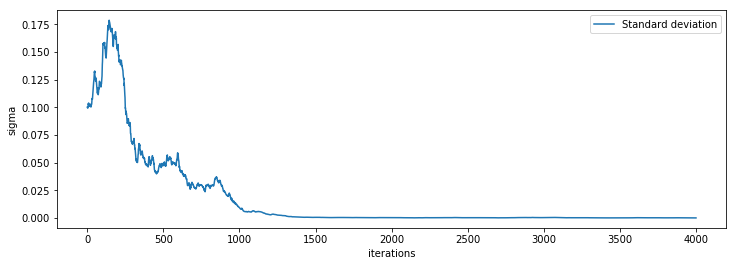

time = 2.264526 sec.
minimums: [26.95175995178306]
total min = 26.9517599518


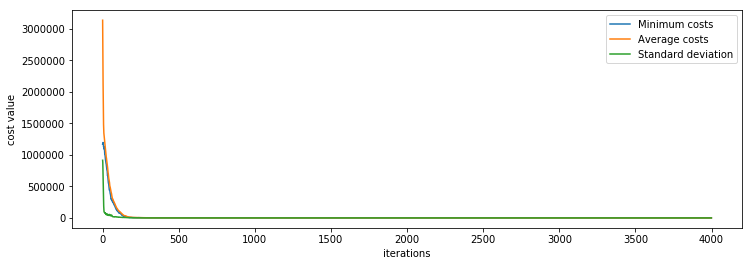

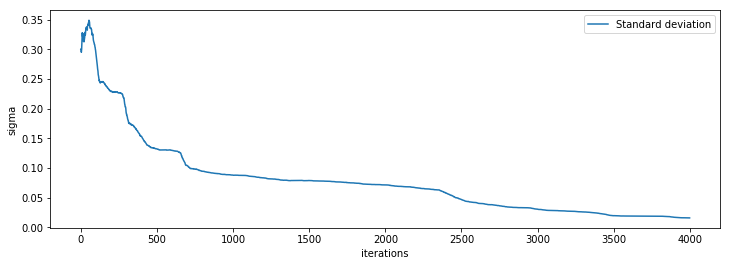

time = 2.353470 sec.
minimums: [27.492565651759762]
total min = 27.4925656518


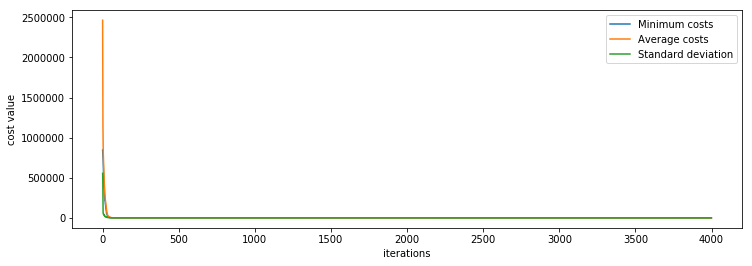

In [280]:
print("rosenbrock, optim value = 0")
for l_m, v, offspring in zip([False, True], [0.1, 0.3], [100, 100]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 30
    for _ in range(1):
        cost_list.append(
            ES( iterations=4000,
               ppl_size=100,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=rosenbrock, 
               tau=0.1/(math.sqrt(2*chromosome_len)),
               tau0=0.1/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-5, 
               max_value=10,
               variance=v))

    print('time = %f sec.' % (time.time() - t0))
    show_results(cost_list)

In [ ]:
ppl_size = 200000
chromosome_length = 100
random_population = np.random.uniform(-5.0, 10.0, size=(ppl_size, chromosome_length))

objective_values = rosenbrock(random_population)
    
print("Minimum = %f" % objective_values.min())
plt.hist(objective_values, bins=100)
plt.show()

In [58]:
def get_feasible(X, g_constraints, h_constraints):
    feasible = np.empty(X.shape[0]).astype(bool)
    feasible[:] = True
    if g_constraints != None:
        feasible = np.all(np.array([con(X)<=0 for con in g_constraints]), axis=0)
    
    return feasible

def rescale_by_feasible(X, objective_values, g_constraints, h_constraints):
    feasible = get_feasible(X, g_constraints, h_constraints)
    infeasible = feasible == False
    feasible[:] = True
    # feasible objectives : (-1,0)
    if np.any(feasible):
        objective_values[feasible] = objective_values[feasible] - objective_values[feasible].max()
        feasible_min_neg = -objective_values[feasible].min()

        if feasible_min_neg == 0: feasible_min_neg = 1
        objective_values[feasible] = objective_values[feasible] / feasible_min_neg
        
    # feasible objectives : (0,1) 
    if g_constraints != None and np.any(infeasible):
        
        objective_values[infeasible] = 0
        g_values = np.array([g(X[infeasible,:]) for g in g_constraints])
        g_values[g_values<0.0] = 0.0
        g_values = g_values - g_values.min(axis=1).reshape(-1,1)
        g_val_sum = g_values.sum(axis=1).reshape(-1,1)
        g_val_sum[g_val_sum == 0] = 1.0
        g_values = g_values / g_val_sum
        g_values = g_values.max(axis=0)
        
        objective_values[infeasible] += g_values
        
    if h_constraints != None and np.any(feasible):
        h_values = np.array([h(X[feasible,:]) for h in h_constraints])
        h_values = np.abs(h_values)
        h_val_max = h_values.max()
        if h_val_max == 0: h_val_max = 1
        h_values = h_values / h_val_max
        h_values = h_values.sum(axis=0)
        
        objective_values[feasible] += h_values

def ES_constrained(iterations, ppl_size, number_of_offspring, chromosome_length, eval_function,
        tau, tau0, g_constraints=None, h_constraints=None, domains=None, maximizing=False, lambda_mi=False, min_value=0.0, 
        max_value=1.0, variance=5*1e-2
        ):
    
    if domains is None:
        current_population = np.random.uniform(min_value, max_value, size=(ppl_size, 2, chromosome_length))
    else:
        current_population = np.random.uniform(domains[:,0], domains[:,1], size=(ppl_size, 2, chromosome_length))
    current_population[:,1,:] = np.random.normal(0, variance, size=(ppl_size, chromosome_length))
    
    objective_values = eval_function(current_population[:,0,:])
    rescale_by_feasible(current_population[:,0,:], objective_values, g_constraints, h_constraints)
    
    costs = np.zeros(iterations)
    
    best_objective_value = np.Inf
    best_chromosome = np.empty((1, chromosome_length))
    
    for iter_num in range(iterations):
        #roulette
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() != 0.0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            
            fitness_values = np.ones(ppl_size) / ppl_size 
        
        parent_indices = np.random.choice(ppl_size, number_of_offspring, True, fitness_values).astype(np.int64)
        
        children_population = np.empty((number_of_offspring, 2, chromosome_length))
        
        children_population[:, 1, :] = current_population[parent_indices, 1, :] * \
            np.exp(np.random.normal(0, tau**2, (number_of_offspring, chromosome_length)) + np.random.normal(0, tau0**2, size=(number_of_offspring,1)))
        children_population[:, 0, :] = current_population[parent_indices, 0, :] + np.random.normal(0, children_population[:, 1, :]**2)
        
        children_population[:, 0, :][children_population[:, 0, :] < min_value] = min_value + 0.01*np.random.uniform(0,max_value-min_value)
        children_population[:, 0, :][children_population[:, 0, :] > max_value] = max_value - 0.01*np.random.uniform(0,max_value-min_value)
        
        children_objective_values = eval_function(children_population[:, 0, :])
        rescale_by_feasible(children_population[:,0,:], children_objective_values, g_constraints, h_constraints)
        if lambda_mi:
            current_population = np.vstack([children_population, current_population])
            objective_values = np.hstack([children_objective_values, objective_values])
        else:
            current_population = children_population
            objective_values = children_objective_values
            
        I = np.argsort(objective_values)
        current_population = current_population[I[:ppl_size], :, :]
        objective_values = objective_values[I[:ppl_size]]
        
        rescale_by_feasible(current_population[:,0,:], objective_values, g_constraints, h_constraints)
        
        feasible = get_feasible(current_population[:,0,:], g_constraints, h_constraints)
        feasible_objectives = eval_function(current_population[feasible,0,:])
        
        # recording some statistics
        if feasible_objectives.shape[0] > 0 and best_objective_value > feasible_objectives[0]:
            best_objective_value = feasible_objectives[0]
            best_chromosome = current_population[feasible, 0, :][0].copy()
        
        costs[iter_num] = best_objective_value
    
    return costs, best_chromosome, best_objective_value

In [ ]:
def get_feasible(X, g_constraints, h_constraints):
    feasible = np.empty(X.shape[0]).astype(bool)
    feasible[:] = True
    if g_constraints != None:
        feasible = np.all(np.array([con(X)<=0 for con in g_constraints]), axis=0)
    
    return feasible

def rescale_by_feasible(X, objective_values, g_constraints, h_constraints):
    feasible = get_feasible(X, g_constraints, h_constraints)
    infeasible = feasible == False
    feasible[:] = True
    # feasible objectives : (-1,0)
    if np.any(feasible):
        objective_values[feasible] = objective_values[feasible] - objective_values[feasible].max()
        #feasible_min_neg = -objective_values[feasible].min()

        #if feasible_min_neg == 0: feasible_min_neg = 1
        #objective_values[feasible] = objective_values[feasible] / feasible_min_neg
        
    # feasible objectives : (0,1) 
    if g_constraints != None and np.any(infeasible):
        
        objective_values[infeasible] = 0
        g_values = np.array([g(X[infeasible,:]) for g in g_constraints])
        g_values[g_values<0.0] = 0.0
        g_values = g_values - g_values.min(axis=1).reshape(-1,1)
        g_val_sum = g_values.sum(axis=1).reshape(-1,1)
        g_val_sum[g_val_sum == 0] = 1.0
        g_values = g_values / g_val_sum
        g_values = g_values.max(axis=0)
        
        objective_values[infeasible] += g_values
        
    if h_constraints != None and np.any(feasible):
        h_values = np.array([h(X[feasible,:]) for h in h_constraints])
        h_values = np.abs(h_values)
        h_val_max = h_values.max()
        if h_val_max == 0: h_val_max = 1
        h_values = h_values / h_val_max
        h_values = h_values.sum(axis=0)
        
        objective_values[feasible] += h_values

def ES_constrained(iterations, ppl_size, number_of_offspring, chromosome_length, eval_function,
        tau, tau0, g_constraints=None, h_constraints=None, domains=None, maximizing=False, lambda_mi=False, min_value=0.0, 
        max_value=1.0, variance=5*1e-2
        ):
    
    if domains is None:
        current_population = np.random.uniform(min_value, max_value, size=(ppl_size, 2, chromosome_length))
    else:
        current_population = np.random.uniform(domains[:,0], domains[:,1], size=(ppl_size, 2, chromosome_length))
    current_population[:,1,:] = np.random.normal(0, variance, size=(ppl_size, chromosome_length))
    
    objective_values = eval_function(current_population[:,0,:])
    rescale_by_feasible(current_population[:,0,:], objective_values, g_constraints, h_constraints)
    
    costs = np.zeros(iterations)
    
    best_objective_value = np.Inf
    best_chromosome = np.empty((1, chromosome_length))
    
    for iter_num in range(iterations):
        #roulette
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() != 0.0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            
            fitness_values = np.ones(ppl_size) / ppl_size 
        
        parent_indices = np.random.choice(ppl_size, number_of_offspring, True, fitness_values).astype(np.int64)
        
        children_population = np.empty((number_of_offspring, 2, chromosome_length))
        
        children_population[:, 1, :] = current_population[parent_indices, 1, :] * \
            np.exp(np.random.normal(0, tau**2, (number_of_offspring, chromosome_length)) + np.random.normal(0, tau0**2, size=(number_of_offspring,1)))
        children_population[:, 0, :] = current_population[parent_indices, 0, :] + np.random.normal(0, children_population[:, 1, :]**2)
        
        children_population[:, 0, :][children_population[:, 0, :] < min_value] = min_value + 0.01*np.random.uniform(0,max_value-min_value)
        children_population[:, 0, :][children_population[:, 0, :] > max_value] = max_value - 0.01*np.random.uniform(0,max_value-min_value)
        
        children_objective_values = eval_function(children_population[:, 0, :])
        #rescale_by_feasible(children_population[:,0,:], children_objective_values, g_constraints, h_constraints)
        if lambda_mi:
            objective_values = np.hstack([children_objective_values, eval_function(current_population[:, 0, :])])
            current_population = np.vstack([children_population, current_population])
        else:
            current_population = children_population
            objective_values = children_objective_values
            
        I = np.argsort(objective_values)
        current_population = current_population[I[:ppl_size], :, :]
        objective_values = objective_values[I[:ppl_size]]
        
        rescale_by_feasible(current_population[:,0,:], objective_values, g_constraints, h_constraints)
        
        feasible = get_feasible(current_population[:,0,:], g_constraints, h_constraints)
        feasible_objectives = eval_function(current_population[feasible,0,:])
        
        # recording some statistics
        if feasible_objectives.shape[0] > 0 and best_objective_value > feasible_objectives[0]:
            best_objective_value = feasible_objectives[0]
            best_chromosome = current_population[feasible, 0, :][0].copy()
        
        costs[iter_num] = best_objective_value
    
    return costs, best_chromosome, best_objective_value

In [10]:
def g2_objective(X):
    return -np.abs( ( (np.cos(X)**4).sum(axis=1) - 2*(np.cos(X)**2).prod(axis=1) ) / 
                  np.sqrt( (( np.arange(X.shape[1])+1)*(X**2) ).sum(axis=1) ) ) 

def g6_objective(X):
    return ((X[:,0] - 10) ** 3) + ((X[:,1] - 20) ** 3)

def g8_objective(X):
    return -( ((np.sin(2*math.pi*X[:,0])**3)*np.sin(2*math.pi*X[:,1])) / ((X[:,0]**3)*X.sum(axis=1))  )

def g9_objective(X):
    return (X[:,0]-10)**2 + 5*(X[:,1]-12)**2 + X[:,2]**4 + 3*(X[:,3]-11)**2 + 10*X[:,4]**6 + 7*(X[:,5])**2 + \
        X[:,6]**4 - 4*(X[:,5]*X[:,6]) - 10*X[:,5] - 8*X[:,6]
    
def g11_objective(X):
    return X[:,0]**2 + (X[:,1]-1)**2

g2, maximization, optim value = 0.8 at n = 20
time = 144.253156 sec.
minimums: [-0.5007581796769307, -0.41934810824727026, -0.36255417132564183, -0.63048011729849263, -0.48388448682029039]
total min = -0.630480117298


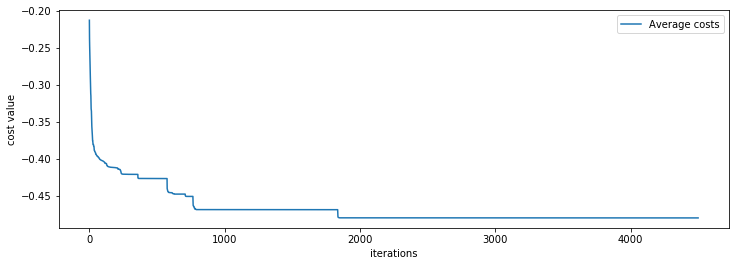

time = 141.665425 sec.
minimums: [-0.52976984448926856, -0.38542101717787086, -0.55207075052899657, -0.38956048873481286, -0.49701111906211926]
total min = -0.552070750529


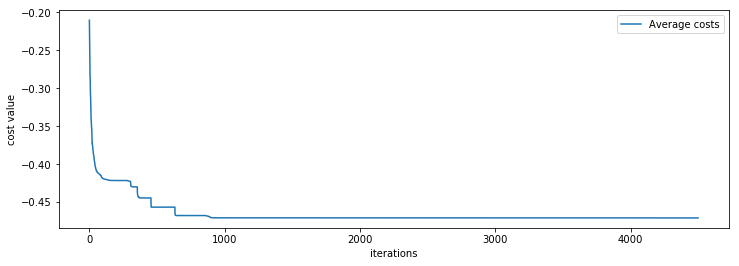

In [47]:
print("g2, maximization, optim value = 0.8 at n = 20")
for l_m, v, offspring in zip([False, True], [0.5, 1.0], [1200, 800]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 20
    
    g_constraints = [
        lambda X: (-X.prod(axis=1) + 0.75),
        lambda X: ( X.sum(axis=1) - 7.5*X.shape[1] ) 
    ]
    
    for _ in range(5):
        costs, best_chromo, best_value = ES_constrained( 
               iterations=4500,
               ppl_size=800,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=g2_objective, 
               tau=1.5/(math.sqrt(2*chromosome_len)),
               tau0=1.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=0, 
               max_value=10,
               variance=v,
               g_constraints=g_constraints)
        cost_list.append(costs)
    
    print('time = %f sec.' % (time.time() - t0))
    show_results_constrained(cost_list)

g2, maximization, optim value = 0.8 at n = 20
time = 183.022055 sec.
minimums: [-0.46321310568203361, -0.42047897286267832, -0.40115454749067886, -0.37577726179651472, -0.42539024288786964]
total min = -0.463213105682


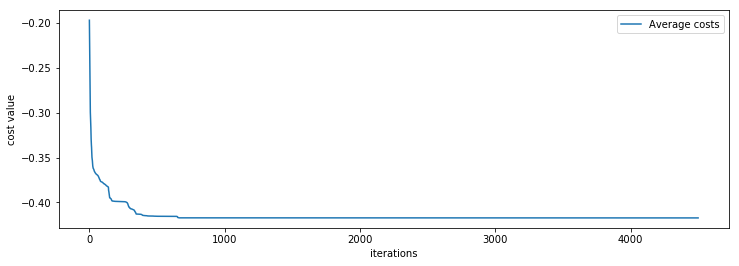

time = 142.482394 sec.
minimums: [-0.43377268515531908, -0.47986057283469336, -0.36430726196665519, -0.38665564711434947, -0.52579782057332425]
total min = -0.525797820573


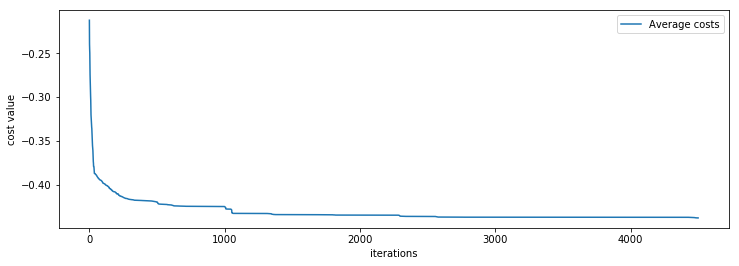

In [55]:
print("g2, maximization, optim value = 0.8 at n = 20")
for l_m, v, offspring in zip([False, True], [0.5, 1.0], [1200, 800]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 20
    
    g_constraints = [
        lambda X: (-X.prod(axis=1) + 0.75),
        lambda X: ( X.sum(axis=1) - 7.5*X.shape[1] ) 
    ]
    
    for _ in range(5):
        costs, best_chromo, best_value = ES_constrained( 
               iterations=4500,
               ppl_size=800,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=g2_objective, 
               tau=1.5/(math.sqrt(2*chromosome_len)),
               tau0=1.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=0, 
               max_value=10,
               variance=v,
               g_constraints=g_constraints)
        cost_list.append(costs)
    
    print('time = %f sec.' % (time.time() - t0))
    show_results_constrained(cost_list)

g6, minimization min=-6961.81388
time = 22.877164 sec.
minimums: [-6961.8138755801665, -6961.8138755801665, -6961.8138755801665, -6961.8138755801665, -6961.8138755801665]
total min = -6961.81387558


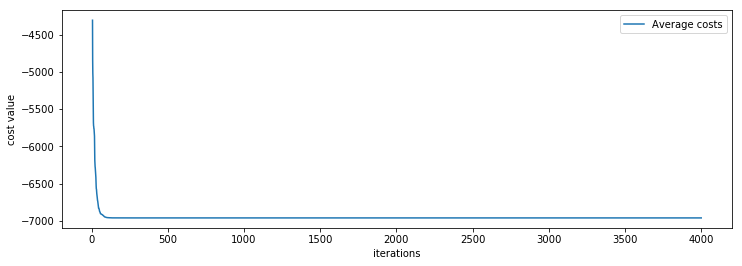

time = 23.577378 sec.
minimums: [-6961.8138755801665, -6961.8138755801665, -6961.8138755801556, -6961.8138755801665, -6961.8138755801474]
total min = -6961.81387558


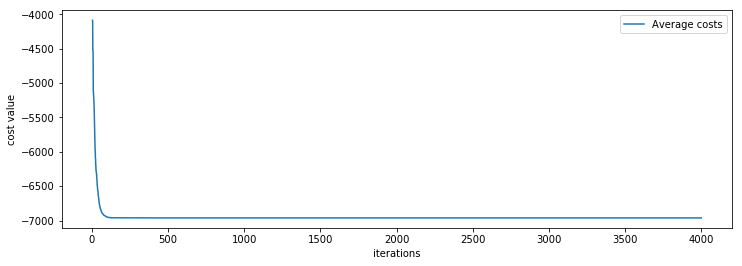

In [28]:
print("g6, minimization min=-6961.81388")
for l_m, v, offspring in zip([False, True], [0.5, 0.5], [1000, 1000]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 2
    
    g_constraints = [
        lambda X: (-(X-5)**2).sum(axis=1) + 100,
        lambda X: ((X[:,0]-6)**2) + ((X[:,1]-5)**2) - 82.81,
        lambda X: 13 - X[:,0]
    ]
    
    for _ in range(5):
        costs, best_chromo, best_value = ES_constrained( 
               iterations=4000,
               ppl_size=600,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=g6_objective, 
               tau=1.5/(math.sqrt(2*chromosome_len)),
               tau0=1.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=0, 
               max_value=100,
               variance=v,
               g_constraints=g_constraints,
               domains=np.array([[13,100], [0,100]]))
        cost_list.append(costs)

    print('time = %f sec.' % (time.time() - t0))
    show_results_constrained(cost_list)

g8, maximization max = 0.095825
time = 39.828460 sec.
minimums: [-0.095825041418035856, -0.095825041418035856, -0.095825041418035856, -0.095825041418035856, -0.09582504141803587, -0.095825041418035856, -0.09582504141803587, -0.095825041418035856, -0.095825041418035856, -0.09582504141803587]
total min = -0.095825041418


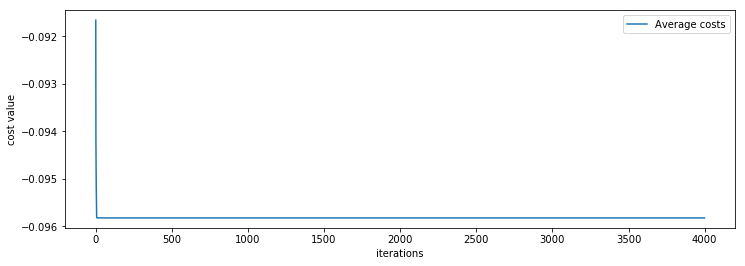

time = 48.037511 sec.
minimums: [-0.095814452634160066, -0.095822269794525738, -0.095823298825384873, -0.095765905561694731, -0.095803733456667137, -0.095823428708270722, -0.095820256291699352, -0.095696378065263807, -0.095725192432591741, -0.095824689604490823]
total min = -0.0958246896045


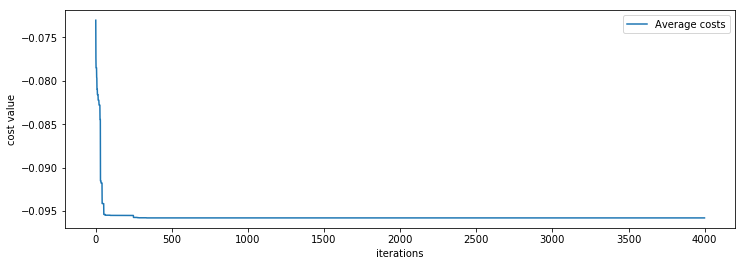

In [26]:
print("g8, maximization max = 0.095825")
for l_m, v, offspring in zip([False, True], [0.5, 0.5], [1000, 1000]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 2
    
    g_constraints = [
        lambda X: X[:,0]**2 - X[:,1] + 1,
        lambda X: 1 - X[:,0] + (X[:,1] - 4)**2
    ]
    
    for _ in range(10):
        costs, best_chromo, best_value = ES_constrained( 
               iterations=4000,
               ppl_size=400,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=g8_objective, 
               tau=1.5/(math.sqrt(2*chromosome_len)),
               tau0=1.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=0, 
               max_value=10,
               variance=v,
               g_constraints=g_constraints)
        cost_list.append(costs)

    print('time = %f sec.' % (time.time() - t0))
    show_results_constrained(cost_list)

g9, minimization min=680.6300573
time = 30.799658 sec.
minimums: [681.27077207454772, 681.53067472421435, 681.58202431163318, 682.35824988935644, 683.68752002896701, 687.09602195774971, 684.14491098941937, 680.97674192567888, 682.09497324814504, 680.92330008618558]
total min = 680.923300086


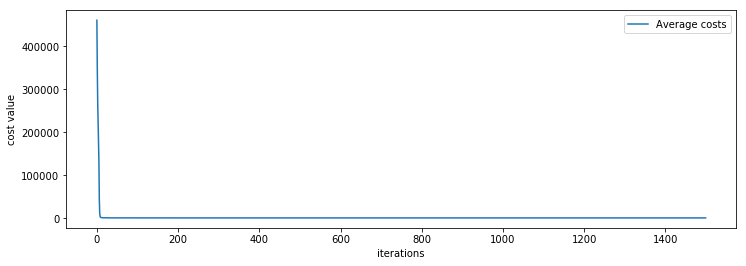

time = 27.209153 sec.
minimums: [1272.7952477097572, 1136.8757130225208, 1217.2299541808363, 1677.5239569018756, 1139.8798185824967, 1194.6674864868171, 1725.1958073050405, 1058.7510153193655, 836.99372824107422, 711.82851232519874]
total min = 711.828512325


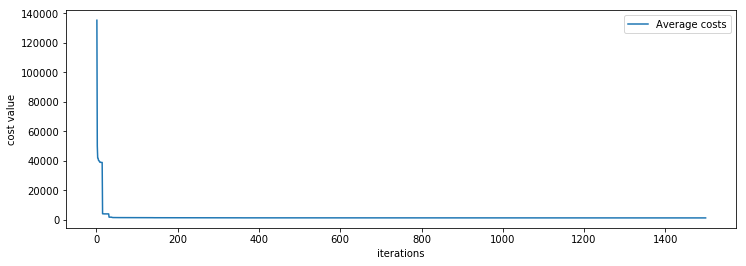

In [56]:
print("g9, minimization min=680.6300573")
for l_m, v, offspring in zip([False, True], [0.5, 0.5], [850, 600]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 7
    
    g_constraints = [
        lambda X: 2*X[:,0]**2+3*X[:,1]**4+X[:,2]+4*X[:,3]**2+5*X[:,4]-127,
        lambda X: 7*X[:,0]+3*X[:,1]+10*X[:,2]**2+X[:,3]-X[:,4]-282,
        lambda X: 23*X[:,0]+X[:,1]+6*X[:,5]**2-8*X[:,6]-196,
        lambda X: 4*X[:,0]**2+X[:,1]**2-3*X[:,0]*X[:,1]+2*X[:,2]**2+5*X[:,5]-11*X[:,6]
    ]
    
    for _ in range(10):
        costs, best_chromo, best_value = ES_constrained( 
               iterations=1500,
               ppl_size=600,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=g9_objective, 
               tau=1.5/(math.sqrt(2*chromosome_len)),
               tau0=1.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-10, 
               max_value=10,
               variance=v,
               g_constraints=g_constraints)
        cost_list.append(costs)

    print('time = %f sec.' % (time.time() - t0))
    show_results_constrained(cost_list)

g11, minimization min=0.75
time = 5.051430 sec.
minimums: [0.58504150697254476, 0.74654599297104096, 0.75041087794381367, 0.74455155561667108, 0.63961969493990822, 0.72257280328660634, 0.75035634371009752, 0.69198202351212101, 0.74995769874524076, 0.74710205662810369]
total min = 0.585041506973


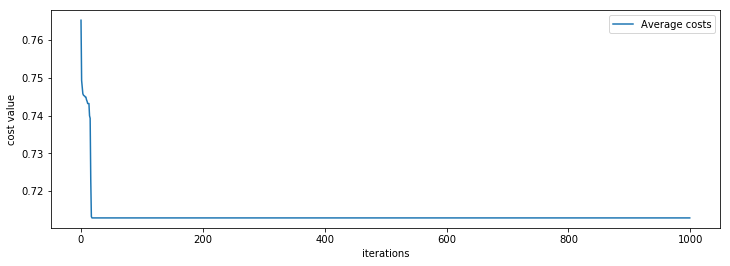

time = 4.266138 sec.
minimums: [0.75001782802035444, 0.76763150518012124, 0.75062447352785189, 0.75002178343372194, 0.71360644540408646, 0.739757369175575, 0.75014922525992933, 0.73709124217364019, 0.7651675751776017, 0.73893076074891029]
total min = 0.713606445404


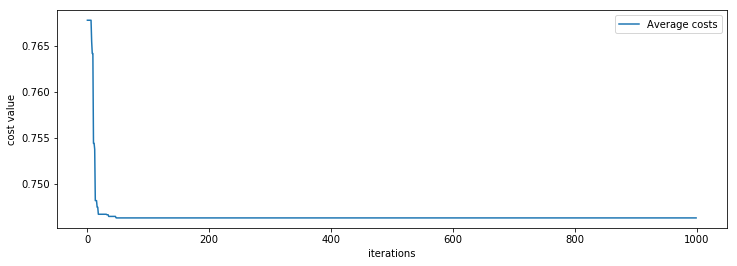

In [59]:
print("g11, minimization min=0.75")
for l_m, v, offspring in zip([False, True], [0.05, 0.05], [400, 200]):
    cost_list = []
    t0 = time.time()
    chromosome_len = 2
    
    h_constraints = [
        lambda X: X[:,1] - X[:,0]**2
    ]
    
    for _ in range(10):
        costs, best_chromo, best_value = ES_constrained( 
               iterations=1000,
               ppl_size=200,
               number_of_offspring=offspring,
               chromosome_length=chromosome_len,
               eval_function=g11_objective, 
               tau=1.5/(math.sqrt(2*chromosome_len)),
               tau0=1.5/(math.sqrt(2*math.sqrt(chromosome_len))),
               lambda_mi=l_m,
               min_value=-1, 
               max_value=1,
               variance=v,
               h_constraints=h_constraints)
        cost_list.append(costs)

    print('time = %f sec.' % (time.time() - t0))
    show_results_constrained(cost_list)